In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Data cleaning  > EDA > PREPROCESSING > MODEL > EVALUTION > IMPROVE > DEPLOYMENT 

# DATA CLEANING

In [14]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.sample()

,v1,v2
2737,ham,Hi Chachi tried calling u now unable to reach ...


In [18]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [20]:
df.sample(2)

,target,text
619,ham,Let there be snow. Let there be snow. This kin...
5554,ham,Well keep in mind I've only got enough gas for...


In [22]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [24]:
# Missing Value

df.isnull().sum()

target    0
text      0
dtype: int64

In [26]:
# Check for duplicates

df.duplicated().sum()

403

In [28]:
# remove 
df.drop_duplicates(keep='first',inplace=True)

In [30]:
df.duplicated().sum()

0

In [32]:
df.shape

(5169, 2)

# EDA

In [35]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [37]:
import matplotlib.pyplot as plt

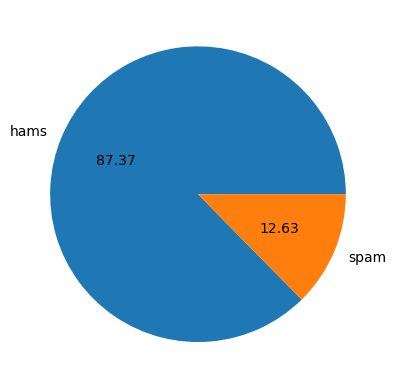

In [39]:
plt.pie(df['target'].value_counts(),labels=['hams','spam'],autopct="%0.2f")
plt.show()

In [41]:
# Data is imbalanced Basically 

In [43]:
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhota\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df['Char']=df['text'].apply(len)

In [51]:
df.sample()

,target,text,Char
2928,0,Where wuld I be without my baby? The thought a...,129


In [53]:
# number of words

df['total_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [54]:
# sentecnce
df['total_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [56]:
df.describe()

,target,Char,total_words,total_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [59]:
df[df['target']==0][['Char','total_words','total_sent']].describe() # ham messgae

,Char,total_words,total_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [61]:
df[df['target']==1][['Char','total_words','total_sent']].describe() # spam messgae

,Char,total_words,total_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [63]:
import seaborn as sns

<Axes: xlabel='Char', ylabel='Count'>

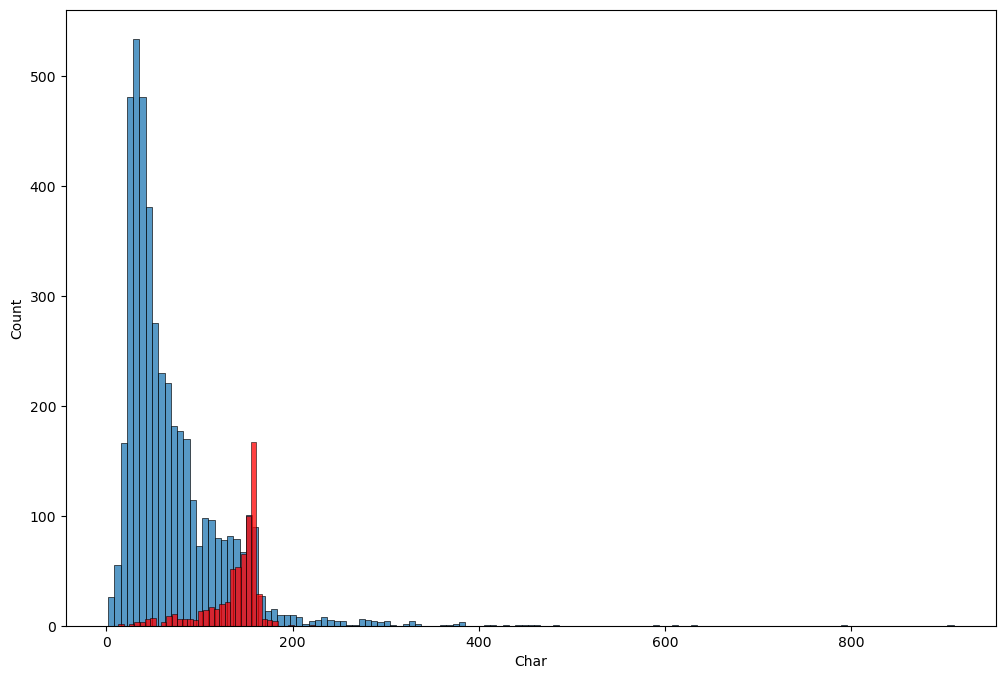

In [65]:
# HAm messgae
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['Char'])
sns.histplot(df[df['target']==1]['Char'],color='red')

<Axes: xlabel='total_words', ylabel='Count'>

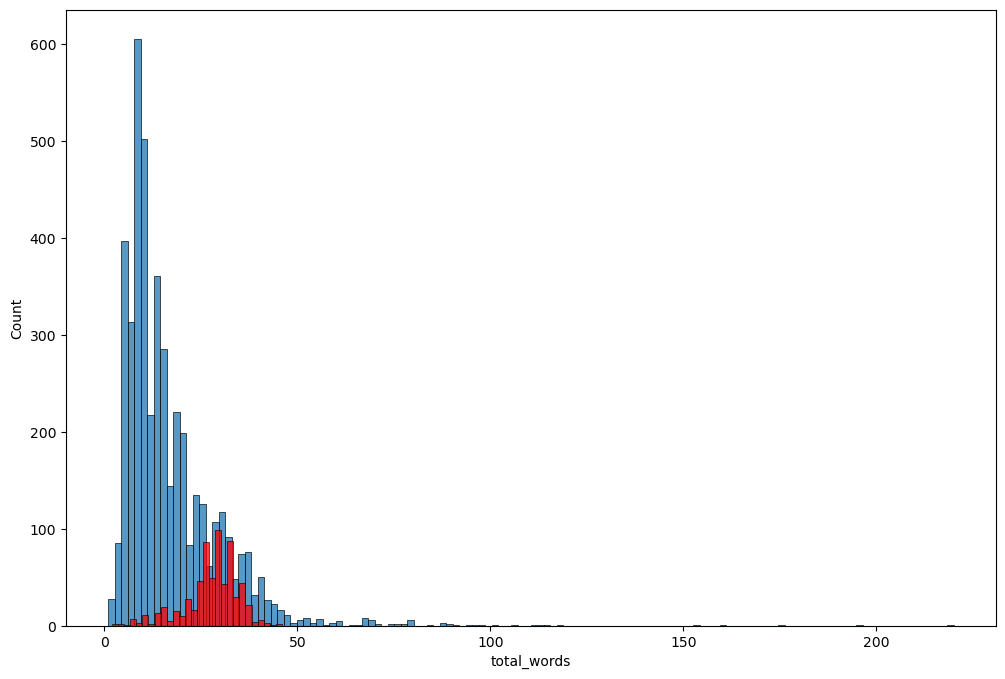

In [66]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['total_words'])
sns.histplot(df[df['target']==1]['total_words'],color='red')

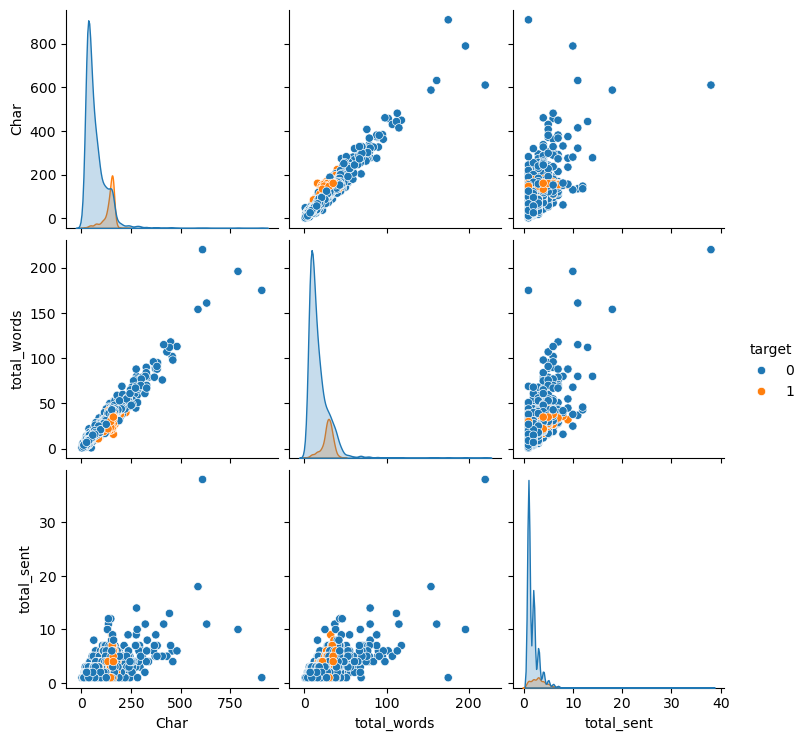

In [69]:
sns.pairplot(df,hue='target')

<Axes: >

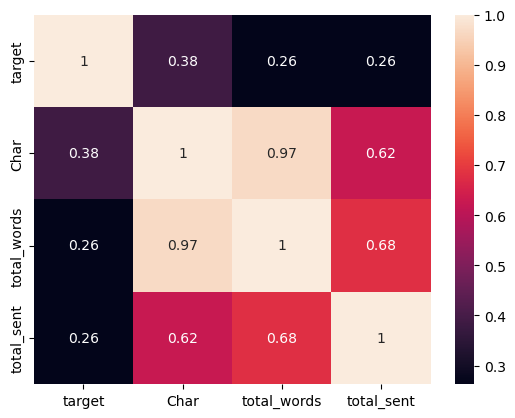

In [70]:
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Data preprocessing

## lowercase , Toeknize , special character , stop words ,punctuations, stemming

In [73]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhota\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhota\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize words

    y = []
    for i in text:  # After tokenization, text becomes a list
        if i.isalnum():  # Keep only alphanumeric words
            y.append(i)

    text = y[:]  # Copy y into text
    y.clear()  # Clear y to reuse

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()


    for i in text:
        y.append(ps.stem(i))

    return " ".join(y) # Return the transformed text

In [79]:
transform_text('Hi HADDKLA yash the if @ loving!^#@*(')

'hi haddkla yash love'

In [81]:
df['transformed_tex'] =df['text'].apply(transform_text)

In [82]:
df.head()

,target,text,Char,total_words,total_sent,transformed_tex
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [85]:
# word cloud 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [87]:
spam_wc=wc.generate(df[df['target']==1]['transformed_tex'].str.cat(sep=" "))

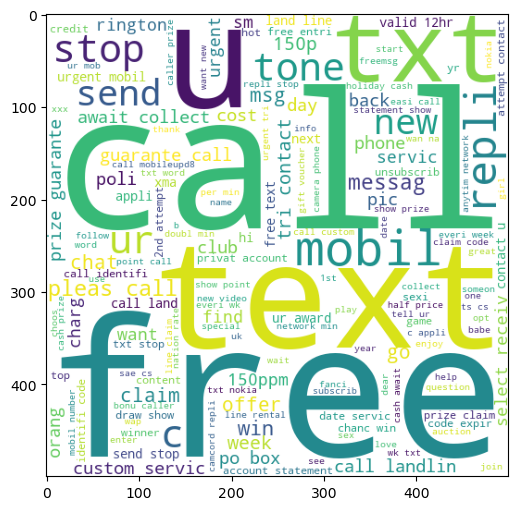

In [88]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [91]:
ham_wc=wc.generate(df[df['target']==0]['transformed_tex'].str.cat(sep=" "))

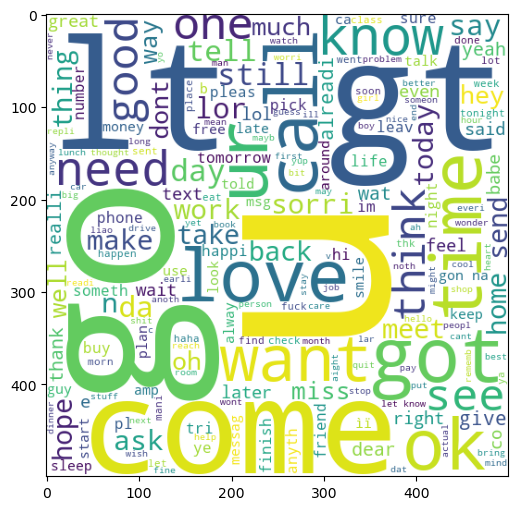

In [92]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [93]:
# Top 30 words in ham and spam

In [97]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_tex'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [107]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_tex'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [109]:
len(ham_corpus)

35404

In [111]:
from collections import Counter
words=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [113]:
words.rename(columns={0:'word',1:'count'},inplace=True)

In [115]:
words

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\jhota\AppData\Local\Temp\ipykernel_13340\3470113094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=words, palette=colors)
C:\Users\jhota\AppData\Local\Temp\ipykernel_13340\3470113094.py:4: UserWarning: 
The palette list has fewer values (5) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='word', y='count', data=words, palette=colors)


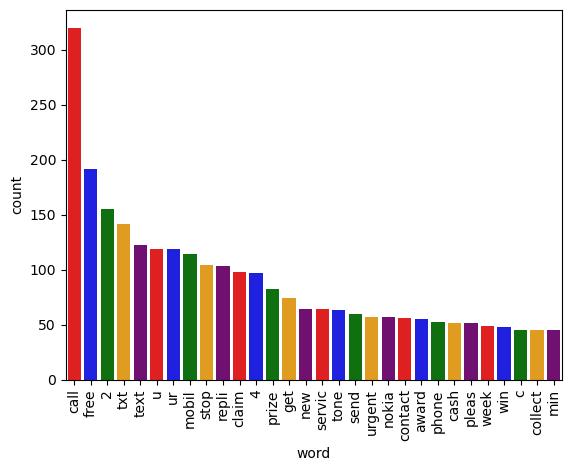

In [117]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the barplot
sns.barplot(x='word', y='count', data=words, palette=colors)
plt.xticks(rotation='vertical')
plt.show()

In [87]:
# Naive Bayes 

## Model Building

In [90]:
# data vectorize using back of words

In [250]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [191]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X1 = scaler.fit_transform(X)

In [193]:

# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [251]:
X1=tfidf.fit_transform(df['transformed_tex']).toarray()

In [197]:
X=cv.fit_transform(df['transformed_tex']).toarray()

In [199]:
y=df['target'].values

In [252]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X1,y,test_size=0.2,random_state=2)

In [253]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [254]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [255]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [256]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [211]:
# No false postiiive 

In [213]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [215]:
# We have choose tfidf -- > mnb

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [219]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [221]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [223]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [225]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [227]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\jhota\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [176]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [177]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [181]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [183]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


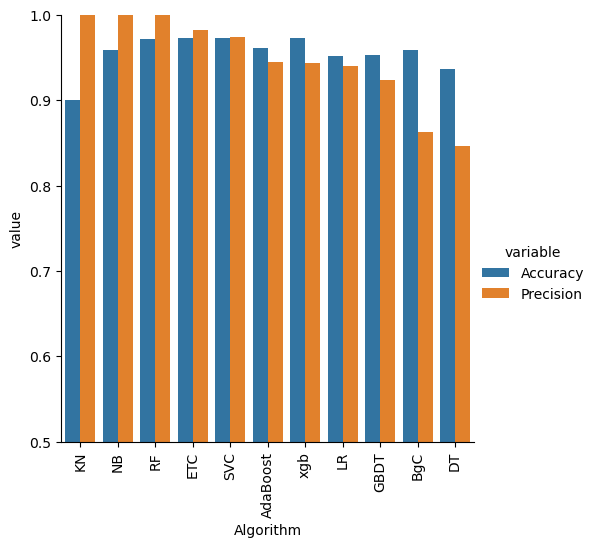

In [185]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


# Model improvement
# 1. Change the max_features parameter of TfIdf

In [229]:
temp300_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [231]:
performance_df.merge(temp300_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [207]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [208]:
# new_df = performance_df.merge(temp_df,on='Algorithm')

In [209]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [210]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [233]:
# new_df_scaled.merge(temp_df,on='Algorithm')

In [235]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [237]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [239]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [240]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [243]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [245]:
from sklearn.ensemble import StackingClassifier

In [247]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [249]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [265]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
# tranform  > Vectorize > Apply algorithm